In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from  sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

import seaborn as sns



In [3]:
df=pd.read_csv('final2.csv')
df.head()
df2=pd.read_csv('train.csv')
df2.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
df['is_duplicate']=df2['is_duplicate']

In [5]:
df['is_duplicate'].head()


0    0
1    0
2    0
3    0
4    0
Name: is_duplicate, dtype: int64

In [6]:
df[df['is_duplicate']==1].count()

Unnamed: 0.1    149263
Unnamed: 0      149263
id              149263
freq_qid1       149263
freq_qid2       149263
                 ...  
296_y           149263
297_y           149263
298_y           149263
299_y           149263
is_duplicate    149263
Length: 630, dtype: int64

In [7]:
df.groupby('is_duplicate')['id'].count()

is_duplicate
0    255027
1    149263
Name: id, dtype: int64

In [8]:
df.head()

,Unnamed: 0.1,Unnamed: 0,id,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,...,291_y,292_y,293_y,294_y,295_y,296_y,297_y,298_y,299_y,is_duplicate
0,0,0,0,1,1,66.0,57.0,14,12,10,...,7.231024,1.531186,-7.528823,0.473802,-11.864658,-11.293788,1.866265,3.616046,11.971096,0
1,1,1,1,4,1,51.0,88.0,8,13,4,...,3.435464,-5.169600,7.102491,34.516881,6.177686,-27.770856,12.926435,-4.564559,33.919834,0
2,2,2,2,1,1,73.0,59.0,14,10,4,...,-1.216773,11.909693,9.591573,11.846737,1.397859,6.454157,-0.271460,-12.500337,27.634567,0
3,3,3,3,1,1,50.0,65.0,11,9,0,...,1.672591,-0.863278,-2.906553,-3.466688,-3.867892,-4.249463,-12.551012,4.494087,-6.223341,0
4,4,4,4,3,1,76.0,39.0,13,7,2,...,-8.444207,-14.450059,-12.709382,-4.449050,12.563987,-11.721362,-16.459300,3.626297,-9.790615,0


In [9]:
cols=list(df.columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Columns: 630 entries, Unnamed: 0.1 to is_duplicate
dtypes: float64(615), int64(15)
memory usage: 1.9 GB


In [10]:
df=df.fillna(0)
df.isnull().values.any()

False

In [11]:
y=df['is_duplicate']
df.drop(['is_duplicate','Unnamed: 0.1','Unnamed: 0','id'],axis=1,inplace=True)

In [12]:
cols=list(df.columns)
for i in cols:
    df[i]=df[i].apply(pd.to_numeric)

In [13]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 404290 entries, 0 to 404289
Series name: is_duplicate
Non-Null Count   Dtype
--------------   -----
404290 non-null  int64
dtypes: int64(1)
memory usage: 3.1 MB


In [14]:
x_train,x_test,y_train,y_test=train_test_split(df,y,stratify=y,test_size=0.3)

In [15]:
print('No. of points in train data',x_train.shape)
print('No. of test data points',x_test.shape)

No. of points in train data (283003, 626)
No. of test data points (121287, 626)


In [16]:
def Confusion_matrix(test_y,predict_y):
    C=confusion_matrix(test_y,predict_y)
    A=(((C.T)/(C.sum(axis=1))).T)
    B=(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    labels=[0,1]
    cmap=sns.light_palette('red')
    plt.subplot(1,3,1)
    sns.heatmap(C,annot=True,cmap=cmap,fmt='.3f',xticklabels=labels,yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title('Confusion Matrix')
    
    plt.subplot(1,3,2)
    sns.heatmap(A,annot=True,cmap=cmap,fmt='.3f',xticklabels=labels,yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title('Precision Matrix')
    
    plt.subplot(1,3,3)
    sns.heatmap(C,annot=True,cmap=cmap,fmt='.3f',xticklabels=labels,yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title('Recall Matrix')
    plt.show()

## Building a random Model

In [17]:
predicted_y=np.zeros((len(y_test),2))
for i in range(len(y_test)):

    rand_probs = np.random.rand(1,2)

    
    predicted_y[i]=((rand_probs/sum(sum(rand_probs)))[0])
print('Log loss on test data using Random model',log_loss(y_test,predicted_y))
predicted_y=np.argmax(predicted_y,axis=1)

Log loss on test data using Random model 0.8876252273910658


#### Since a random model gives a log loss of 0.8845 than the log loss for any sensible model should be <0.8845

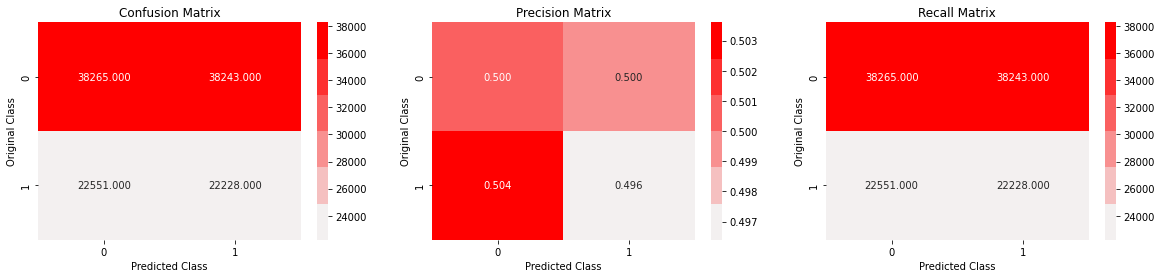

In [18]:

Confusion_matrix(y_test,predicted_y)

In [19]:
alpha=[10**x for x in range(-5,2)]
log_error_array=[]
for i in alpha:
    clf= SGDClassifier(alpha=i,penalty='l2',loss='log_loss',random_state=42)
    clf.fit(x_train,y_train)
    sig_clf=CalibratedClassifierCV(clf,method='sigmoid')
    sig_clf.fit(x_train,y_train)
    predicted_y=sig_clf.predict_proba(x_test)
    log_error_array.append(log_loss(y_test,predicted_y,labels=clf.classes_))
    print('For values of alpha =',i,"The log loss is: ",log_error_array[-1])



For values of alpha = 1e-05 The log loss is:  0.4464717751459756
For values of alpha = 0.0001 The log loss is:  0.4438432180099445
For values of alpha = 0.001 The log loss is:  0.44395352157490675
For values of alpha = 0.01 The log loss is:  0.42149293843705155
For values of alpha = 0.1 The log loss is:  0.4279990615086401
For values of alpha = 1 The log loss is:  0.4631041524874093
For values of alpha = 10 The log loss is:  0.5121427927763119


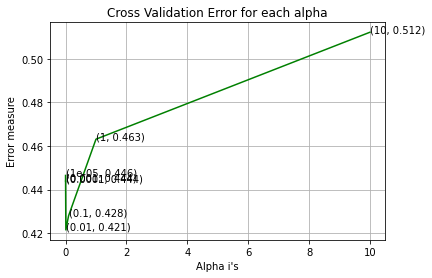

The log loss on train dataset  0.4201899177416916
The log loss on test dataset  0.4201108694345099


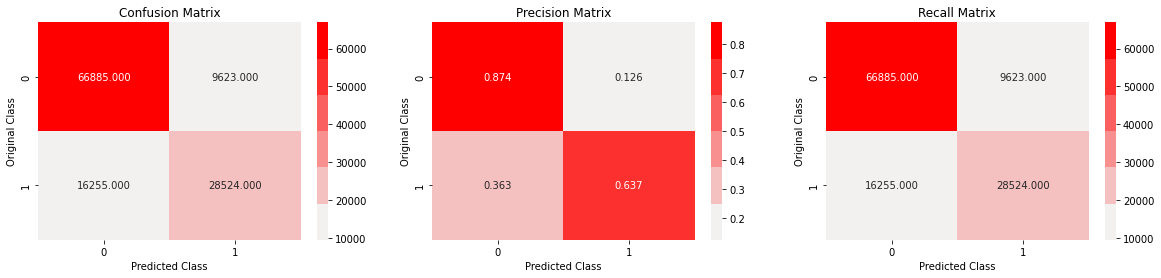

In [20]:
min_log_loss=np.argmin(log_error_array)
fig,ax=plt.subplots()
ax.plot(alpha,log_error_array,c='g')
for i,txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)),(alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel('Error measure')
plt.show()

best_alpha=np.argmin(log_error_array)
clf=SGDClassifier(alpha=alpha[best_alpha],penalty='l2',loss='log_loss')
clf.fit(x_train,y_train)
sig_clf=CalibratedClassifierCV(clf,method='sigmoid')
sig_clf.fit(x_train,y_train)

predict_y=sig_clf.predict_proba(x_train)
print('The log loss on train dataset ',log_loss(y_train,predict_y,labels=clf.classes_))
predict_y=sig_clf.predict_proba(x_test)
print('The log loss on test dataset ',log_loss(y_test,predict_y,labels=clf.classes_))
predicted_y =np.argmax(predict_y,axis=1)
Confusion_matrix(y_test,predicted_y)

For values of alpha =  1e-05 The log loss is: 0.44521899952927646


C:\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum

For values of alpha =  0.0001 The log loss is: 0.4586442095217553


C:\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum

For values of alpha =  0.001 The log loss is: 0.5197026639512741


C:\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum

For values of alpha =  0.01 The log loss is: 0.47103336749206026


C:\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum

For values of alpha =  0.1 The log loss is: 0.5300780336264551


C:\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


For values of alpha =  1 The log loss is: 0.6152835301001535


C:\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


For values of alpha =  10 The log loss is: 0.6487554728619935


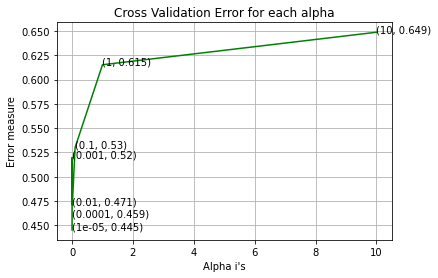

For values of best alpha =  1e-05 The train log loss is: 0.44630764710765675


NameError: name 'X_test' is not defined

In [21]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.




log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42,n_jobs=-1)
    clf.fit(x_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(x_train, y_train)
    predict_y = sig_clf.predict_proba(x_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(x_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_train, y_train)

predict_y = sig_clf.predict_proba(x_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
Confusion_matrix(y_test, predicted_y)